# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [1]:
import pandas as pd
import sklearn.model_selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [2]:
def read_data(path):
    #DONE replace the following line with our code
    data = pd.read_csv(path)
    data = data.drop(['name'], axis=1)
    Y = data['status']
    X = data.drop('status', axis=1)
    return X , Y

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [3]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

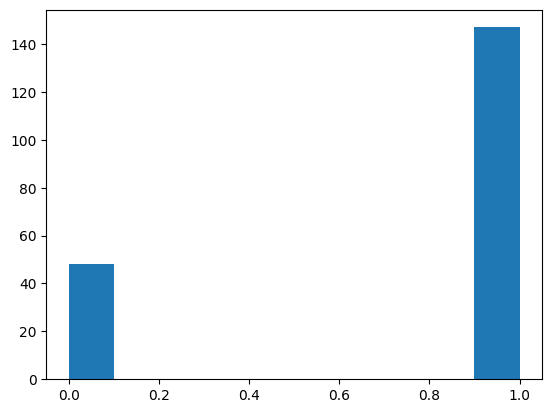

In [5]:
plt.hist(data_Y)

Plot the histograms of the first 5 attributes. 

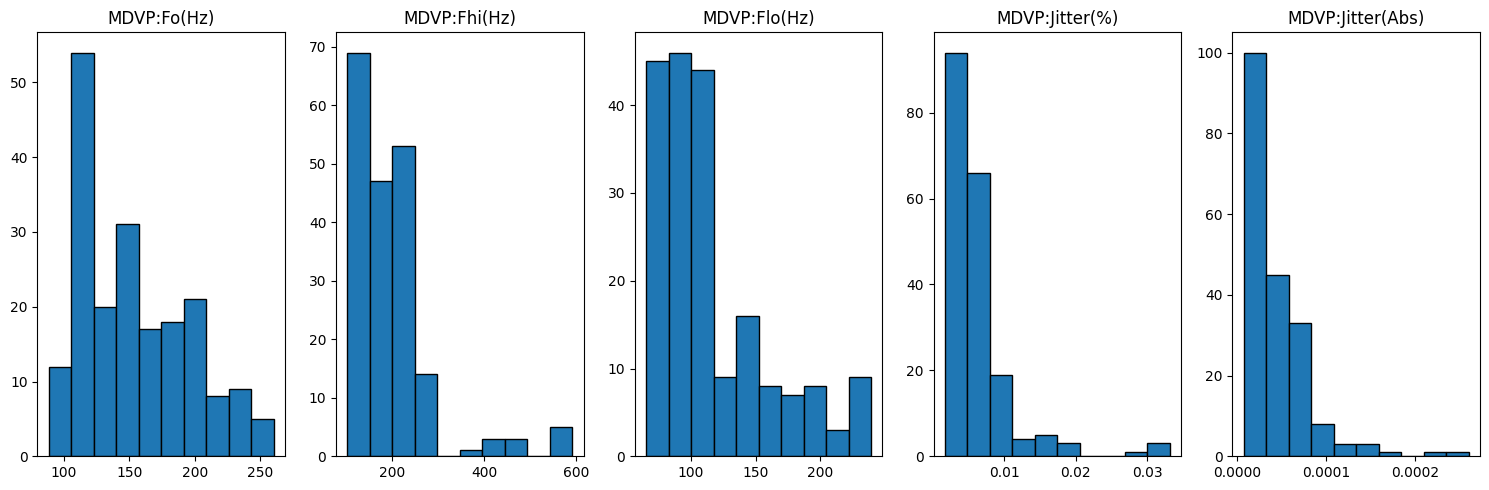

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].hist(data_X.iloc[:, i], edgecolor='black')
    axes[i].set_title(data_X.columns[i])

plt.tight_layout()
plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [7]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    return train_test_split(data_X, data_Y, test_size=test_percent/100, random_state=random_state)
    
(train_X, test_X, train_Y, test_Y) = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [8]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    neigh = KNeighborsClassifier(k)
    neigh.fit(train_data_X, train_data_Y)

    accuracy = metrics.accuracy_score(test_data_Y, neigh.predict(test_data_X))
    return accuracy

get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.7692307692307693

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [9]:

def standarize_train_and_test(train_X, test_X, option = 1):
    if option == 1:
        scaler = preprocessing.StandardScaler()
    elif option == 2:
        scaler = preprocessing.MinMaxScaler()
    else:
        scaler = preprocessing.MaxAbsScaler()

    norm_train_X = scaler.fit_transform(train_X)
    norm_test_X = scaler.transform(test_X)
    return norm_train_X, norm_test_X


norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, 1)
print(get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y))

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, 2)
print(get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y))

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, 3)
print(get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y))

0.9743589743589743
0.9743589743589743
0.9743589743589743


# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

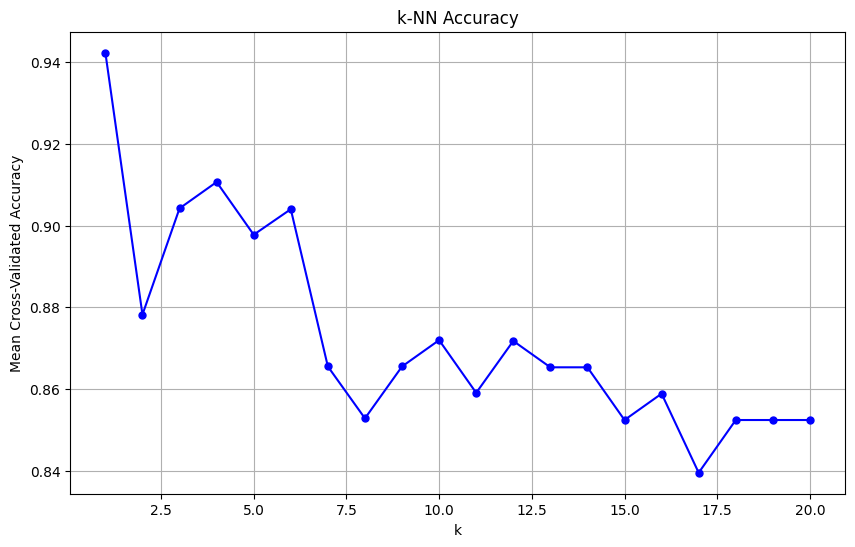

The best k value is 1 with a mean (training) accuracy of 0.9423387096774194


In [10]:

accuracy_scores = []
for k in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=k)
    # todo PYTANIE: czy używać tutaj norm_train_X, czy przedłużyć to o _test_X, z racji że używamy cross-walidacji
    cv_results = sklearn.model_selection.cross_validate(neigh, norm_train_X, train_Y, cv=5, scoring='accuracy')
    accuracy_scores.append(cv_results['test_score'].mean())

# print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_scores, marker='o', color='b', linestyle='-', markersize=5)
plt.xlabel("k")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.title("k-NN Accuracy")
plt.grid()
plt.show()

best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"The best k value is {best_k} with a mean (training) accuracy of {max(accuracy_scores)}")


# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [11]:
final_accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=best_k)
# print(best_k, final_accuracy)
print(final_accuracy)

# bonus, sprawdzenie pozostałych czy "najlepsze" k jest rzeczywiście najlepsze
# acc2scores = []
# for k in range(1, 21):
#     final_accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=k)
#     print(f"{k}: final_accuracy: {final_accuracy}")
#     acc2scores.append(final_accuracy)
# new_best_k = acc2scores.index(max(acc2scores)) + 1
# print(f"The best k value is {new_best_k} with accuracy of {max(acc2scores)}")


0.9487179487179487


# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    


In [12]:
def standardize_set(X, option = 1):
    if option == 1:
        scaler = preprocessing.StandardScaler()
    elif option == 2:
        scaler = preprocessing.MinMaxScaler()
    else:
        scaler = preprocessing.MaxAbsScaler()
    norm_X = scaler.fit_transform(X)
    return norm_X


The best k value is 1 with a mean (training) accuracy of 0.6773970398970399
The final accuracy is: 0.6625


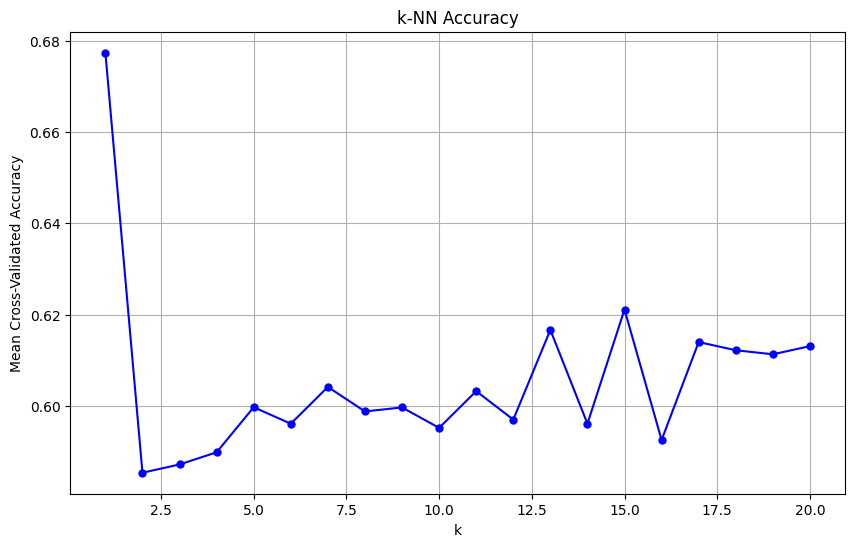

In [13]:
data = pd.read_csv("./winequality-red.csv")
# print(data)
Y = data['quality']
X = data.drop('quality', axis = 1)

# is it needed to split, if we use cv? anyway, sticking to plan
(train_X, test_X, train_Y, test_Y) = split_data(X, Y, 30)
norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, 1)

# norm_X = standardize_set(X, 1)
# print(norm_X)

# finding best k
accuracy_scores = []
for k in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=k)
    cv_results = sklearn.model_selection.cross_validate(neigh, norm_train_X, train_Y, cv=10, scoring='accuracy')
    accuracy_scores.append(cv_results['test_score'].mean())

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_scores, marker='o', color='b', linestyle='-', markersize=5)
plt.xlabel("k")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.title("k-NN Accuracy")
plt.grid()
# plt.show()
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"The best k value is {best_k} with a mean (training) accuracy of {max(accuracy_scores)}")

# get final accuracy
final_accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=best_k)
print(f"The final accuracy is: {final_accuracy}")

# - curiosity, jak wypada dla danych testowych!
#final_scores = []
#for k in range(1, 21):
#    final_score = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=k)
#    final_scores.append(final_score)
#
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, 21), final_scores, marker='o', color='b', linestyle='-', markersize=5)
#plt.xlabel("k")
#plt.ylabel("Mean Cross-Validated Accuracy")
#plt.title("k-NN Accuracy")
#plt.grid()
#plt.show()

# todo WRITE A REPORT




Homework - report

Chosen split method:
train_test_split z sklearn, z 70% danych na zestaw uczący i 30% na zestaw testowy

Used preprocessing methods - sklearn preprocessing standard scaler.

Plot above.

Najlepszą celność klasyfikacji otrzymujemy przy k=1, dla którego dokładny wynik również pokazany jest tuż nad wykresem powyżej


**całość raportu była wykonywana wykonywana w tej samej parze jak poprzednie**
- Wojciech Kot, 151879
- Julia Samp, 151775
z grupy L7, zajęcia piątkowe 11:45